In [104]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.corpus import stopwords
from scipy.misc import imread
from scipy import spatial
from operator import itemgetter

In [2]:
movies = pd.read_csv('tmdb_5000_movies.csv')

In [3]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
#finding out how the json object looks like
movies.iloc[0,1]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [5]:
#we need to read the json format in columns so apply json.loads
movies['genres'] = movies['genres'].apply(json.loads)

In [6]:
#how the json object now looks and reads like
movies['genres'][0]

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [7]:
for index,i in zip(movies.index,movies['genres']):
    #create an empty list to append each genre of a specific index movie
    li = []
    for j in range(len(i)):
        #since we want the name of each genres j iterates through the list and name is the key to access genre value
        li.append(i[j]['name'])
    #convert into str since otherwise the values(type) for each row will be different
    movies.loc[index,'genres']=str(li)

In [8]:
movies['genres'][0]
#working fine

"['Action', 'Adventure', 'Fantasy', 'Science Fiction']"

In [9]:
#Do this for each column with json object !

In [10]:
movies['keywords']=movies['keywords'].apply(json.loads)

In [11]:
for index,i in zip(movies.index,movies['keywords']):
    li=[]
    for j in range(len(i)):
        li.append(i[j]['name'])
    movies.loc[index,'keywords']=str(li)

In [12]:
movies['production_companies']=movies['production_companies'].apply(json.loads)
for index,i in zip(movies.index,movies['production_companies']):
    li=[]
    for j in range(len(i)):
        li.append(i[j]['name'])
    movies.loc[index,'production_companies']=str(li)
    
movies['production_countries']=movies['production_countries'].apply(json.loads)
for index,i in zip(movies.index,movies['production_countries']):
    li=[]
    for j in range(len(i)):
        li.append(i[j]['name'])
    movies.loc[index,'production_countries']=str(li)

movies['spoken_languages']=movies['spoken_languages'].apply(json.loads)
for index,i in zip(movies.index,movies['spoken_languages']):
    li=[]
    for j in range(len(i)):
        li.append(i[j]['name'])
    movies.loc[index,'spoken_languages']=str(li)

In [13]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",http://www.avatarmovie.com/,19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"['Adventure', 'Fantasy', 'Action']",http://disney.go.com/disneypictures/pirates/,285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",['United States of America'],2007-05-19,961000000,169.0,['English'],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"['Action', 'Adventure', 'Crime']",http://www.sonypictures.com/movies/spectre/,206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"['Columbia Pictures', 'Danjaq', 'B24']","['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",http://www.thedarkknightrises.com/,49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...",['United States of America'],2012-07-16,1084939099,165.0,['English'],Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"['Action', 'Adventure', 'Science Fiction']",http://movies.disney.com/john-carter,49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,['Walt Disney Pictures'],['United States of America'],2012-03-07,284139100,132.0,['English'],Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [14]:
#Now I am going to do the same for credits csv file and then merge the two on movie id

In [15]:
credits = pd.read_csv('tmdb_5000_credits.csv')

In [16]:
credits.head(1)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [17]:
#The cast and the crew are in json file format so let's convert them too but before that let's have a closer look

In [18]:
credits['cast'][10]

'[{"cast_id": 3, "character": "Superman / Clark Kent", "credit_id": "52fe42f8c3a36847f8030b65", "gender": 2, "id": 17271, "name": "Brandon Routh", "order": 0}, {"cast_id": 1, "character": "Lex Luthor", "credit_id": "52fe42f8c3a36847f8030b61", "gender": 2, "id": 1979, "name": "Kevin Spacey", "order": 1}, {"cast_id": 4, "character": "Lois Lane", "credit_id": "52fe42f8c3a36847f8030b69", "gender": 1, "id": 7517, "name": "Kate Bosworth", "order": 2}, {"cast_id": 10, "character": "Richard White", "credit_id": "52fe42f8c3a36847f8030b8b", "gender": 2, "id": 11006, "name": "James Marsden", "order": 3}, {"cast_id": 11, "character": "Kitty Kowalski", "credit_id": "52fe42f8c3a36847f8030b8f", "gender": 1, "id": 7489, "name": "Parker Posey", "order": 4}, {"cast_id": 12, "character": "Perry White", "credit_id": "52fe42f8c3a36847f8030b93", "gender": 2, "id": 8924, "name": "Frank Langella", "order": 5}, {"cast_id": 13, "character": "Jimmy Olsen", "credit_id": "52fe42f8c3a36847f8030b97", "gender": 0, "i

In [19]:
#Now since these also use the keyword name, we can use our previous approach to convert the cast as well !

In [20]:
credits['cast']=credits['cast'].apply(json.loads)
for index,i in zip(credits.index,credits['cast']):
    li = []
    for j in range(len(i)):
        li.append(i[j]['name'])
    credits.loc[index,'cast']=str(li)

In [21]:
#let's look at crew !
credits['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [22]:
#Now in this I only want the directors name to be used for simpler analysis

In [23]:
credits['crew'] = credits['crew'].apply(json.loads)

In [24]:
def director(x):
    for i in x:
        if(i['job']=='Director'):
            return i['name']
credits['crew'] = credits['crew'].apply(director)

In [25]:
credits.rename(columns={'crew':'director'},inplace=True)

In [26]:
credits.head(1)

,movie_id,title,cast,director
0,19995,Avatar,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",James Cameron


In [27]:
#Merging the two csv files :
movies = movies.merge(credits, left_on='id',right_on='movie_id', how = 'left')

In [28]:
movies = movies[['id','original_title','genres','cast','vote_average','director','keywords']]

In [29]:
movies.head(1)

,id,original_title,genres,cast,vote_average,director,keywords
0,19995,Avatar,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",7.2,James Cameron,"['culture clash', 'future', 'space war', 'spac..."


In [30]:
movies['genres'][0]
#we can clean this further

"['Action', 'Adventure', 'Fantasy', 'Science Fiction']"

In [31]:
movies['genres']=movies['genres'].str.strip('[]')

In [32]:
movies['genres'][0]

"'Action', 'Adventure', 'Fantasy', 'Science Fiction'"

In [33]:
movies['genres']=movies['genres'].str.replace("'",'').str.replace(' ','')

In [34]:
movies['genres'][0]

'Action,Adventure,Fantasy,ScienceFiction'

In [35]:
movies['genres']=movies['genres'].str.split(",")

In [36]:
movies['genres'][0]

['Action', 'Adventure', 'Fantasy', 'ScienceFiction']

In [37]:
#doing the same with cast and keywords !

In [38]:
movies['cast']=movies['cast'].str.strip('[]').str.replace("'",'').str.replace(' ','')
movies['cast']=movies['cast'].str.split(",")

In [39]:
pd.Series(li).value_counts()[:10].sort_values().values

array([1, 1, 1, 1, 1, 1, 1, 1])

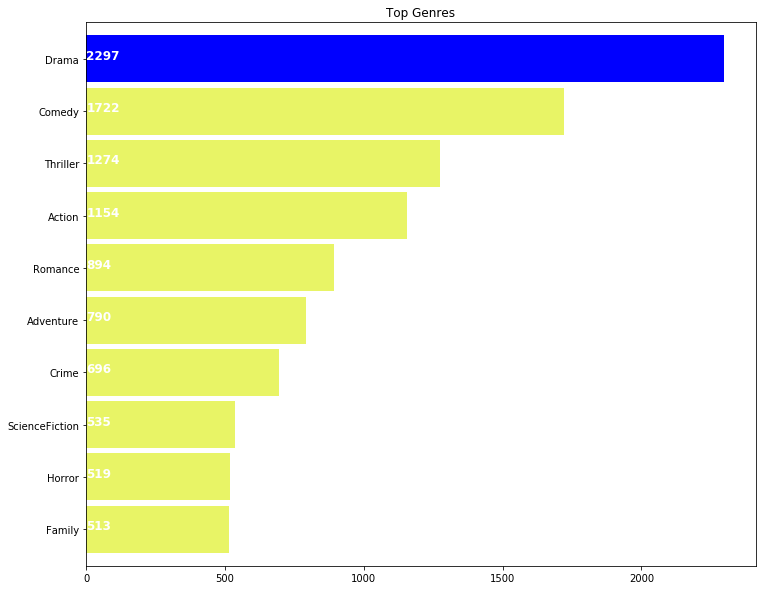

In [40]:
plt.subplots(figsize=(12,10))
list1=[]
for i in movies['genres']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('summer_r',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('b')
plt.title('Top Genres')
plt.show()

In [41]:
#sorting the genres in alphabetic order
for i,j in zip(movies['genres'],movies.index):
    list2=[]
    list2=i
    list2.sort()
    movies.loc[j,'genres']=str(list2)
movies['genres']=movies['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['genres']=movies['genres'].str.split(',')

In [42]:
movies['genres'][0]

['Action', 'Adventure', 'Fantasy', 'ScienceFiction']

In [43]:
genrelist = []
for i,j in movies.iterrows():
    genres = j['genres']
    for genre in genres:
        if genre not in genrelist:
            genrelist.append(genre)
genrelist[:10]

['Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'Crime',
 'Drama',
 'Thriller',
 'Animation',
 'Family',
 'Western']

In [44]:
#now what I want to do is make a genrelist to represent genre action, adventure, etc as 1,0,.. if movie is action and not adventure and so on 
def x(inp):
    li = []
    for i in genrelist:
        if i in inp:
            li.append(1)
        else:
            li.append(0)
    return li
movies['genre_binary'] = movies['genres'].apply(x)

In [45]:
movies.head(1)

,id,original_title,genres,cast,vote_average,director,keywords,genre_binary
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",7.2,James Cameron,"['culture clash', 'future', 'space war', 'spac...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [46]:
#Now I am going to do pretty much the same thing for cast column as well

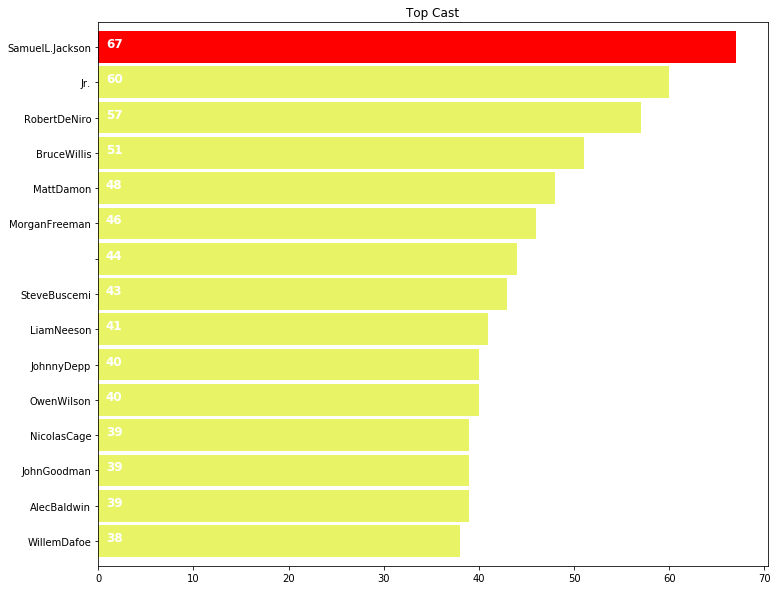

In [47]:
plt.subplots(figsize=(12,10))
list1=[]
for i in movies['cast']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('summer_r',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
ax.patches[14].set_facecolor('r')
plt.title('Top Cast')
plt.show()

In [48]:
for i,j in zip(movies['cast'],movies.index):
    li = []
    # Selecting the top 4 stars only (order of star is already according to their importance in the movies) !
    li = i[:4]
    movies.loc[j,'cast'] = str(li)
movies['cast']=movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['cast']=movies['cast'].str.split(',')
for i,j in zip(movies['cast'],movies.index):
    list2=[]
    list2=i
    list2.sort()
    movies.loc[j,'cast']=str(list2)
movies['cast']=movies['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['cast']=movies['cast'].str.split(',')

In [49]:
movies['cast'].head(1)

0    [SamWorthington, SigourneyWeaver, StephenLang,...
Name: cast, dtype: object

In [50]:
castlist = []
for i,j in movies.iterrows():
    casts = j['cast']
    for cast in casts:
        if cast not in castlist:
            castlist.append(cast)
castlist[:10]

['SamWorthington',
 'SigourneyWeaver',
 'StephenLang',
 'ZoeSaldana',
 'JohnnyDepp',
 'KeiraKnightley',
 'OrlandoBloom',
 'StellanSkarsgård',
 'ChristophWaltz',
 'DanielCraig']

In [51]:
def x(inp):
    li = []
    for i in castlist:
        if i in inp:
            li.append(1)
        else:
            li.append(0)
    return li
movies['cast_binary'] = movies['cast'].apply(x)

In [52]:
movies.head(1)

,id,original_title,genres,cast,vote_average,director,keywords,genre_binary,cast_binary
0,19995,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]","[SamWorthington, SigourneyWeaver, StephenLang,...",7.2,James Cameron,"['culture clash', 'future', 'space war', 'spac...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [53]:
#Now doing pretty much the same thing for director column ! (we have to remove some discrepencies though)
def xstr(s):
    if s is None:
        return ''
    return str(s)
movies['director']=movies['director'].apply(xstr)

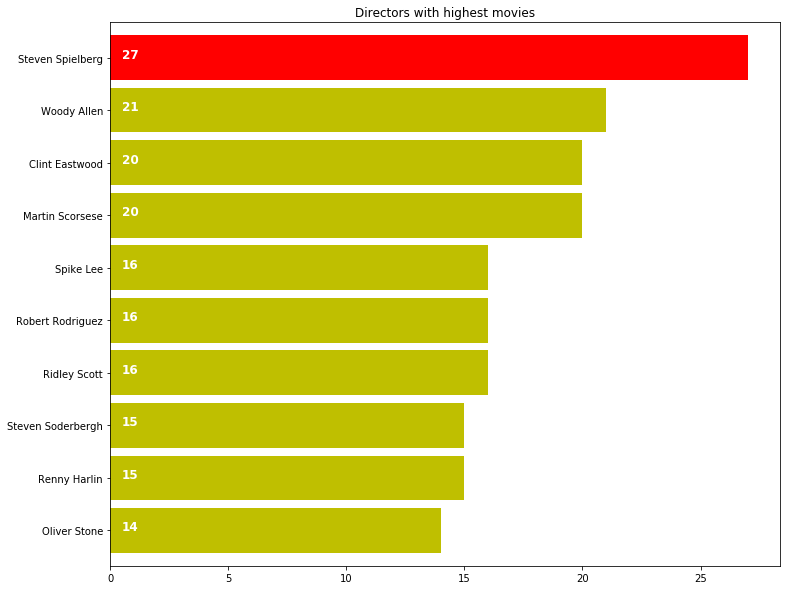

In [54]:
plt.subplots(figsize=(12,10))
ax=movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.85,color='y')
for i, v in enumerate(movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.5, i, v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('r')
plt.title('Directors with highest movies')
plt.show()

In [55]:
directorList=[]
for i in movies['director']:
    if i not in directorList:
        directorList.append(i)

In [56]:
def x(inp):
    li = []
    for i in directorList:
        if i in inp:
            li.append(1)
        else:
            li.append(0)
    return li
movies['director_binary'] = movies['director'].apply(x)

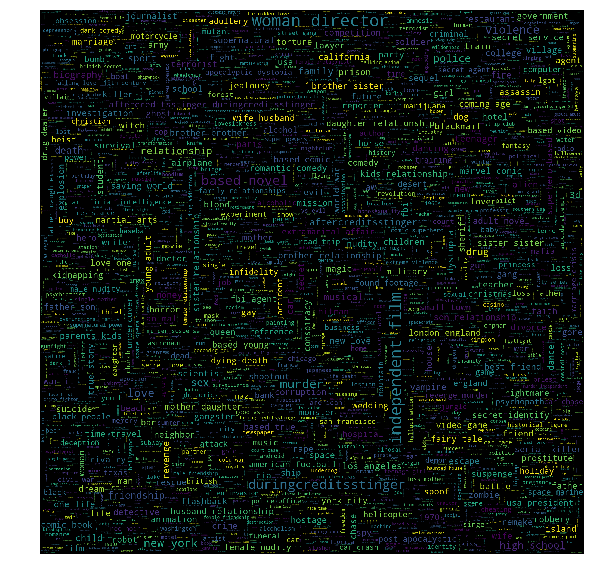

In [57]:

### Part I currently don't understand !!!!!!

plt.subplots(figsize=(12,12))
stop_words = set(stopwords.words('english'))
stop_words.update(',',';','!','?','.','(',')','$','#','+',':','...',' ','')

img1 = imread("apple.png")
hcmask1 = img1
words=movies['keywords'].dropna().apply(nltk.word_tokenize)
word=[]
for i in words:
    word.extend(i)
word=pd.Series(word)
word=([i for i in word.str.lower() if i not in stop_words])
wc = WordCloud(background_color="black", max_words=4000, mask=hcmask1,
               stopwords=STOPWORDS, max_font_size= 60,width=1000,height=1000)
wc.generate(" ".join(word))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

In [58]:
#doing same binarize thing for keywords !
movies['keywords']=movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
movies['keywords']=movies['keywords'].str.split(',')
for i,j in zip(movies['keywords'],movies.index):
    list2=[]
    list2=i
    movies.loc[j,'keywords']=str(list2)
movies['keywords']=movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['keywords']=movies['keywords'].str.split(',')
for i,j in zip(movies['keywords'],movies.index):
    list2=[]
    list2=i
    list2.sort()
    movies.loc[j,'keywords']=str(list2)
movies['keywords']=movies['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies['keywords']=movies['keywords'].str.split(',')
words_list = []
for index, row in movies.iterrows():
    genres = row["keywords"]
    
    for genre in genres:
        if genre not in words_list:
            words_list.append(genre)
def binary(words):
    binaryList = []
    
    for genre in words_list:
        if genre in words:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList
movies['words_bin'] = movies['keywords'].apply(lambda x: binary(x))
movies=movies[movies['vote_average']!=0] #removing the movies with 0 score and without drector names 
movies=movies[movies['director']!='']

In [61]:
def similarity(id1,id2):
    a = movies.iloc[id1]
    b = movies.iloc[id2]
    
    genre_a = a['genre_binary']
    genre_b = b['genre_binary']
    
    score1 = spatial.distance.cosine(genre_a,genre_b)
    
    cast_a = a['cast_binary']
    cast_b = b['cast_binary']
    
    score2 = spatial.distance.cosine(cast_a,cast_b)
    
    director_a = a['director_binary']
    director_b = b['director_binary']
    
    score3 = spatial.distance.cosine(director_a,director_b)
    
    words_a = a['words_bin']
    words_b = b['words_bin']
    
    score4 = spatial.distance.cosine(words_a,words_b)
    
    return score1+score2+score3+score4

In [65]:
similarity(3,160)

3.2958758547680684

In [69]:
movies.iloc[160],movies.iloc[3]

(id                                                             82702
 original_title                            How to Train Your Dragon 2
 genres             [Action, Adventure, Animation, Comedy, Family,...
 cast               [GerardButler, JayBaruchel, JonahHill, Kristen...
 vote_average                                                     7.6
 director                                                Dean DeBlois
 keywords           [3d, deathofhusband, dragon, fathersonrelation...
 genre_binary       [1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, ...
 cast_binary        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
 director_binary    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
 words_bin          [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
 Name: 160, dtype: object,
 id                                                             49026
 original_title                                 The Dark Knight Rises
 genres                              [Action, Crime, Drama, Thr

In [70]:
new_id = list(range(0,movies.shape[0]))
movies['new_id'] = new_id
movies=movies[['original_title','genres','vote_average','genre_binary','cast_binary','new_id','director','director_binary','words_bin']]
movies.head(2)

,original_title,genres,vote_average,genre_binary,cast_binary,new_id,director,director_binary,words_bin
0,Avatar,"[Action, Adventure, Fantasy, ScienceFiction]",7.2,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0,James Cameron,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,Pirates of the Caribbean: At World's End,"[Action, Adventure, Fantasy]",6.9,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...",1,Gore Verbinski,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [108]:


###### very important step : .to_frame().T converts returned row of datframe(single) to dataframe of single row
def naaiice(name):
    new_movie=movies[movies['original_title'].str.contains(name)].iloc[0].to_frame().T
    print('Selected movie : ',new_movie.iloc[0,0])
    def getNeighbors(baseMovie, K):
        distances = []
    
        for index, movie in movies.iterrows():
            if movie['new_id'] != baseMovie['new_id'].values[0]:
                dist = similarity(baseMovie['new_id'].values[0], movie['new_id'])
                distances.append((movie['new_id'], dist))
    
        distances.sort(key=itemgetter(1))
        neighbors = []
    
        for x in range(K):
            neighbors.append(distances[x])
        return neighbors

    K = 10
    avgRating = 0
    neighbors = getNeighbors(new_movie, K)
    
    print('\nRecommended Movies: \n')
    for neighbor in neighbors:
        avgRating = avgRating+movies.iloc[neighbor[0]][2]  
        print( movies.iloc[neighbor[0]][0]+" | Genres: "+str(movies.iloc[neighbor[0]][1]).strip('[]').replace(' ','')+" | Rating: "+str(movies.iloc[neighbor[0]][2]))
    
    print('\n')
    avgRating = avgRating/K
    print('The predicted rating for %s is: %f' %(new_movie['original_title'].values[0],avgRating))
    print('The actual rating for %s is %f' %(new_movie['original_title'].values[0],new_movie['vote_average']))

In [111]:
naaiice('Godfather')

### Keep in mind the rating is calculated as the average of 10 closest movies as found by cosine similarity
### We can change the number of movies to be recommended and calculate the average from by changing value of k in function naaiice


Selected movie :  The Godfather: Part III

Recommended Movies: 

The Godfather: Part II | Genres: 'Crime','Drama' | Rating: 8.3
The Godfather | Genres: 'Crime','Drama' | Rating: 8.4
The Rainmaker | Genres: 'Crime','Drama','Thriller' | Rating: 6.7
The Outsiders | Genres: 'Crime','Drama' | Rating: 6.9
Donnie Brasco | Genres: 'Crime','Drama','Thriller' | Rating: 7.4
The Son of No One | Genres: 'Crime','Drama','Thriller' | Rating: 4.8
Absolute Power | Genres: 'Crime','Drama','Thriller' | Rating: 6.4
The Conversation | Genres: 'Crime','Drama','Mystery' | Rating: 7.5
The Devil's Own | Genres: 'Crime','Drama','Thriller' | Rating: 5.9
We Own the Night | Genres: 'Crime','Drama','Thriller' | Rating: 6.5


The predicted rating for The Godfather: Part III is: 6.880000
The actual rating for The Godfather: Part III is 7.100000
